In [34]:
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(columns = ['CustomerId', 'Surname', 'RowNumber'], inplace = True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
data = pd.get_dummies(data, columns = ['Geography', 'Gender'], drop_first = True)

In [9]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = data.drop(columns = ['Exited'])
y = data['Exited']

In [11]:
X.shape

(10000, 11)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape

(8000, 11)

In [16]:
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.fit_transform(X_test)

In [25]:
model = Sequential()
model.add(Dense(11, activation = 'sigmoid', input_dim = 11))
model.add(Dense(11, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(X_train_trf, y_train, batch_size = 50, epochs = 100, verbose = 1, validation_split = 0.2)

Epoch 1/100


128/128 [==============================] - 2s 6ms/step - loss: 0.6875 - accuracy: 0.5528 - val_loss: 0.5423 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5073 - accuracy: 0.7958 - val_loss: 0.4877 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4807 - accuracy: 0.7958 - val_loss: 0.4744 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4693 - accuracy: 0.7958 - val_loss: 0.4648 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4598 - accuracy: 0.7958 - val_loss: 0.4566 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4513 - accuracy: 0.7958 - val_loss: 0.4492 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.7959 - val_loss: 0.4430 - val_accuracy: 0.79

128/128 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8347 - val_loss: 0.4060 - val_accuracy: 0.8331
Epoch 55/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8358 - val_loss: 0.4058 - val_accuracy: 0.8331
Epoch 56/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8347 - val_loss: 0.4059 - val_accuracy: 0.8331
Epoch 57/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8345 - val_loss: 0.4062 - val_accuracy: 0.8344
Epoch 58/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8361 - val_loss: 0.4056 - val_accuracy: 0.8338
Epoch 59/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8355 - val_loss: 0.4055 - val_accuracy: 0.8338
Epoch 60/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8353 - val_loss: 0.4056 - val_accuracy: 0.8338
Epoch

In [29]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 3ms/step


In [30]:
y_pred

array([[0.17330384],
       [0.27221414],
       [0.1697153 ],
       ...,
       [0.12560534],
       [0.09699861],
       [0.17910406]], dtype=float32)

In [31]:
y_pred = y_pred.argmax(axis = -1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.7975

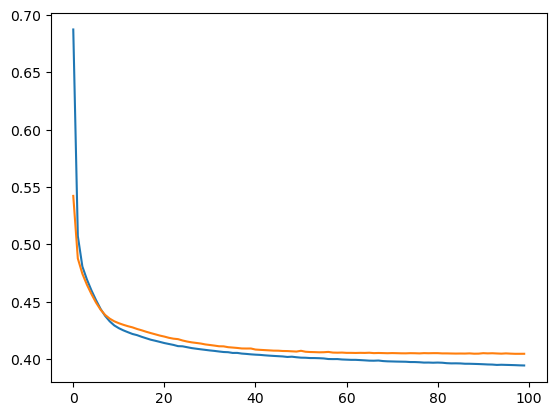

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

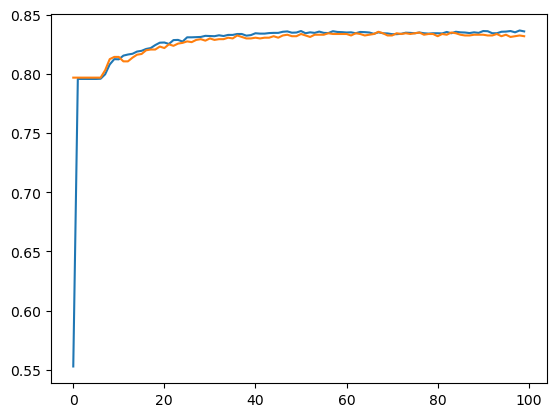

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])